# Tugas 5 : keyword extraction

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import numpy as np
import re
import nltk
!pip install Sastrawi
nltk.download('punkt')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

import networkx as nx
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/ppw/report/tugas-ppw/hasil_prepros.csv")
df.head()

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,stopword_removal
0,"Gaduh Poster 'Berobat ke Malaysia Aja', Kemenk...","Kamis, 10 Okt 2024 10:06 WIB",Jakarta - Kementerian Kesehatan RI (Kemenkes) ...,Kesehatan,Jakarta Kementerian Kesehatan RI Kemenkes ang...,jakarta kementerian kesehatan ri kemenkes ang...,"['jakarta', 'kementerian', 'kesehatan', 'ri', ...",jakarta kementerian kesehatan ri kemenkes angk...
1,Viral Poster 'Berobat ke Malaysia Aja' Dekat K...,"Kamis, 10 Okt 2024 09:42 WIB",Jakarta - Baru-baru ini publik dihebohkan deng...,Kesehatan,Jakarta Barubaru ini publik dihebohkan dengan...,jakarta barubaru ini publik dihebohkan dengan...,"['jakarta', 'barubaru', 'ini', 'publik', 'dihe...",jakarta barubaru publik dihebohkan unggahan po...
2,"Waspadai Gejala Kanker Paru, Dokter Ungkap Bis...","Kamis, 10 Okt 2024 09:33 WIB",Jakarta - Kanker paru terjadi akibat pembelaha...,Kesehatan,Jakarta Kanker paru terjadi akibat pembelahan...,jakarta kanker paru terjadi akibat pembelahan...,"['jakarta', 'kanker', 'paru', 'terjadi', 'akib...",jakarta kanker paru akibat pembelahan sel terk...
3,Kondisi Terkini Raja Salman usai Jalani Perawa...,"Kamis, 10 Okt 2024 09:01 WIB","Jakarta - Raja Arab Saudi, Salman bin Abdulazi...",Kesehatan,Jakarta Raja Arab Saudi Salman bin Abdulaziz ...,jakarta raja arab saudi salman bin abdulaziz ...,"['jakarta', 'raja', 'arab', 'saudi', 'salman',...",jakarta raja arab saudi salman bin abdulaziz d...
4,Cerita Dokter Temukan Anak Alami Anemia gegara...,"Kamis, 10 Okt 2024 08:31 WIB",Jakarta - Viral sebuah template Instagram stor...,Kesehatan,Jakarta Viral sebuah template Instagram stori...,jakarta viral sebuah template instagram stori...,"['jakarta', 'viral', 'sebuah', 'template', 'in...",jakarta viral template instagram stories beris...


In [22]:
# Mengambil satu sample berita
sample_berita = df['stopword_removal'].iloc[4]

sample_berita_list = [sample_berita]
print(sample_berita_list)


['jakarta viral template instagram stories berisi imbauan teh anak mengganggu proses penyerapan zat besi anak berisiko mengalami anemia fungsi zat besi membantu perkembangan otak kecerdasan kognitif konsentrasi iq berguna meningkatkan imunitas kekebalan tubuh sumber energi otot keterampilan motorik mencegah stunting tulis foto resep dokter ramai dibagikan spesialis anak dr jati kusuma wardhani spa kali membagikan konten menemukan anemia defisiensi besi dokter berpraktik semarang jawa pemberian teh anak salah pemicunya kasusnya pemberian teh anak mbahmbah ibuibu muda terkait info dr jati dihubungi detikcom rabu ditemukan anemia defisiensi besi cenderung sulit orang tua dr jati seringkali anemia defisiensi besi terdeteksi memiliki gejala khas kondisi ditemukan acak pemeriksaan lab anak sakit dirawat dokter imbauannya teh anak menyusui hamil wanita usia subur diharapkan membatasi konsumsi teh temuan anemia defisiensi besi anak konten unggah dr jati menceritakan salah pasiennya mengalami a

In [23]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer tanpa batasan jumlah fitur
vectorizer = TfidfVectorizer()

# Fit dan transform teks ke dalam TF-IDF
tfidf_matrix = vectorizer.fit_transform(sample_berita_list)

# Konversi TF-IDF matrix ke DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df.head()

,acak,akibat,aktif,anak,anemia,anjlok,apapun,avksuc,berdasarkan,bergejala,...,tubuh,tulis,unggah,unggahan,usia,viral,wanita,wardhani,ya,zat
0,0.03745,0.03745,0.03745,0.449404,0.299602,0.03745,0.03745,0.03745,0.03745,0.074901,...,0.03745,0.03745,0.03745,0.03745,0.03745,0.03745,0.03745,0.03745,0.03745,0.074901


In [24]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_tfidf_1berita = tfidf_df.apply(lambda col: col.map(lambda x: 1 if x >= 0.03 else 0))

# Menampilkan DataFrame dengan nilai biner
df_tfidf_1berita

,acak,akibat,aktif,anak,anemia,anjlok,apapun,avksuc,berdasarkan,bergejala,...,tubuh,tulis,unggah,unggahan,usia,viral,wanita,wardhani,ya,zat
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [25]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_tfidf_1berita.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_tfidf_1berita)):
    features = df_tfidf_1berita.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

        Node  Degree Centrality
0       acak                1.0
109   profil                1.0
93        om                1.0
94     orang                1.0
95      otak                1.0
..       ...                ...
49      izin                1.0
50     jajan                1.0
51   jakarta                1.0
52      jati                1.0
145      zat                1.0

[146 rows x 2 columns]


In [26]:
# Ambil top 10 fitur dengan degree centrality tertinggi
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()

# DataFrame yang difilter berdasarkan top 10 fitur
filtered_df_train_tfidf = df_tfidf_1berita.copy()

# Tampilkan pesan tentang top 10 fitur yang terpilih
print("\nTop 10 fitur berdasarkan degree centrality:")
print(top_10_features)

# Tampilkan DataFrame asli yang masih memiliki semua fitur
print("\nDataFrame asli dengan semua fitur (tanpa menghapus):")
print(filtered_df_train_tfidf)



Top 10 fitur berdasarkan degree centrality:
['acak', 'profil', 'om', 'orang', 'otak', 'otot', 'pakde', 'papanya', 'pasien', 'pasiennya']

DataFrame asli dengan semua fitur (tanpa menghapus):
   acak  akibat  aktif  anak  anemia  anjlok  apapun  avksuc  berdasarkan  \
0     1       1      1     1       1       1       1       1            1   

   bergejala  ...  tubuh  tulis  unggah  unggahan  usia  viral  wanita  \
0          1  ...      1      1       1         1     1      1       1   

   wardhani  ya  zat  
0         1   1    1  

[1 rows x 146 columns]


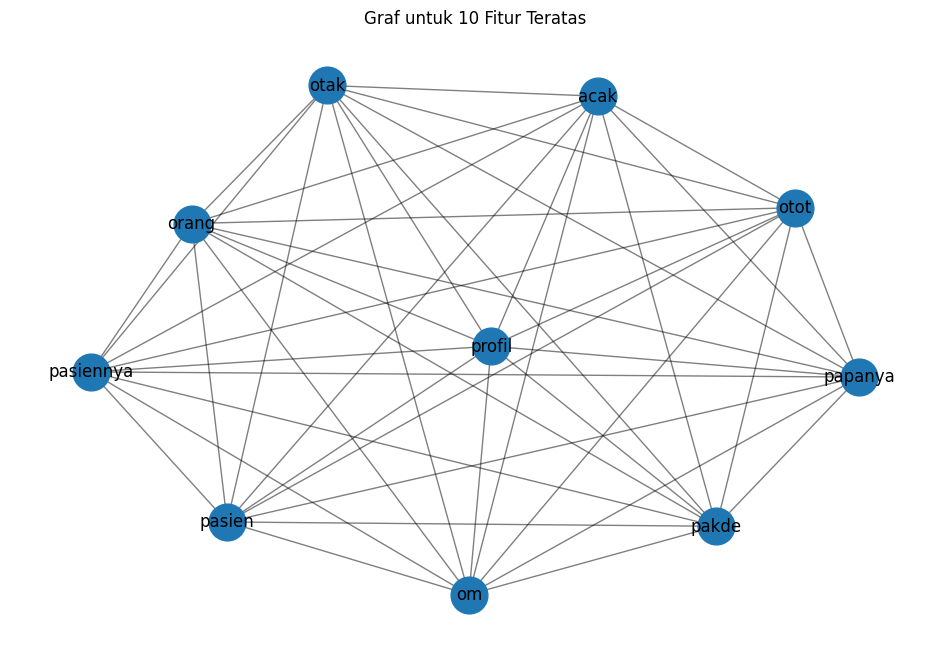

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Pastikan df_tfidf_1berita adalah nama yang benar dari dataframe yang mengandung data biner (TF-IDF)
if 'df_tfidf_1berita' in locals():
    # Menambahkan edge berdasarkan co-occurrence dari fitur teratas
    for i in range(len(df_tfidf_1berita)):
        features = df_tfidf_1berita.iloc[i]
        active_features = features[features == 1].index.tolist()
        active_top_10_features = [f for f in active_features if f in top_10_features]

        for j in range(len(active_top_10_features)):
            for k in range(j + 1, len(active_top_10_features)):
                G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

    # Mengatur ukuran figure untuk visualisasi graf
    plt.figure(figsize=(12, 8))

    # Menggambar graf fitur teratas
    pos = nx.spring_layout(G_top_10)
    nx.draw_networkx_nodes(G_top_10, pos, node_size=700)
    nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')

    # Menampilkan graf
    plt.title('Graf untuk 10 Fitur Teratas')
    plt.axis('off')  # Menyembunyikan sumbu
    plt.show()
else:
    print("DataFrame 'df_tfidf_1berita' tidak ditemukan. Pastikan proses TF-IDF sudah dilakukan.")


In [28]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

        Node  Degree Centrality  Closeness Centrality  Betweenness Centrality
0       acak                1.0                   1.0                     0.0
1     profil                1.0                   1.0                     0.0
2         om                1.0                   1.0                     0.0
3      orang                1.0                   1.0                     0.0
4       otak                1.0                   1.0                     0.0
5       otot                1.0                   1.0                     0.0
6      pakde                1.0                   1.0                     0.0
7    papanya                1.0                   1.0                     0.0
8     pasien                1.0                   1.0                     0.0
9  pasiennya                1.0                   1.0                     0.0


In [29]:
# Mengambil kata kunci dengan nilai TF-IDF tertinggi untuk setiap dokumen
kata_kunci = df_tfidf_1berita.idxmax(axis=1)
print("\nKata kunci dari setiap dokumen:")
for i, kata in enumerate(kata_kunci):
    print(f"Dokumen {i+1}: {kata}")


Kata kunci dari setiap dokumen:
Dokumen 1: acak
